In [1]:
!pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4477 sha256=0d98fd451555ab6753535225f557174d2605b61b85b6fe9f8cf750f631e103f1
  Stored in directory: /root/.cache/pip/wheels/0e/b7/36/aa37256db62b4bfd35a6f1b5536e9ba843f257b79dcbf3d5f1
Successfully built preprocessor


In [2]:
import tweepy as tweepy
 
import pandas as pd
import csv
import re 
import string
import preprocessor as p
from google.colab import drive
drive.mount('/content/drive')
 

# Davidson's keys
# consumer_key = 'xx'
# consumer_secret = 'x'
# access_token= 'xx-x'
# access_token_secret = 'x'


Mounted at /content/drive


In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

In [4]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
search_words = "#SupportSmallBusiness"      #enter your words
new_search = search_words + " -filter:retweets"

In [6]:
csvFile = open('file-name', 'a')
csvWriter = csv.writer(csvFile)

In [11]:
import re
import io
import csv
import tweepy
from tweepy import OAuthHandler
#TextBlob perform simple natural language processing tasks.
#from textblob import TextBlob

consumer_key = 'uJbX6lhdmzVPo6lOOBeDiRj93'
consumer_secret = 'o5AiZAoN45LnKj696QNbwWdZwHr7FTkYrrbyEtboxpn4fJofdU'
access_token= '1492785565594533889-maCchN69E6cbRBe4fOJAlolW9n8utd'
access_token_secret = '26eEMmpjAftW5dhYD10ThorpqW94afUquqHz8hzp98rlK'

# create OAuthHandler object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# set access token and secret
auth.set_access_token(access_token, access_token_secret)
# create tweepy API object to fetch tweets
api = tweepy.API(auth)#, wait_on_rate_limit=True)




def get_tweets(query, count = 300):

    # empty list to store parsed tweets
    tweets = []
    target = io.open("/content/drive/MyDrive/TwitterAnalysis/"+query+".txt", 'w', encoding='utf-8')
    # call twitter api to fetch tweets
    q=str(query)
    fetched_tweets = api.search(q, count = count)
    # parsing tweets one by one
    print(len(fetched_tweets))

    for tweet in fetched_tweets:

        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        target.write(tweet.text+"\n")
    return fetched_tweets

    # creating object of TwitterClient Class
    # calling function to get tweets

In [12]:
tweets_SB = get_tweets(query ="#SupportSmallBusiness", count = 500)

100


In [13]:
import json

In [14]:
print(tweets_SB[0]._json)

{'created_at': 'Mon Mar 21 06:07:28 +0000 2022', 'id': 1505788163364696068, 'id_str': '1505788163364696068', 'text': 'RT @solveigakiran1: Boot socks, women cozy socks, eco natural woolen socks, warm winter socks, handmade white socks, gift for Mom, gift for…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'solveigakiran1', 'name': 'solveiga', 'id': 4726014317, 'id_str': '4726014317', 'indices': [3, 18]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">WomenInExcellence</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1308040042724519939, 'id_str': '1308040042724519939', 'name': 'Women Who Rule!', 'screen_name': 'in_stemm', 'location': '', 'description': 'A friendly bot 

In [15]:
!pip install twitter

     |████████████████████████████████| 50 kB 3.8 MB/s 


In [26]:
def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        # print(json_response)
        # print(json_response.user.location)
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']
            print(geo)
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 

def auth():
    return os.getenv('TOKEN')

In [17]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [18]:
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [19]:
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
    
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

In [20]:
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAANorZQEAAAAAGT6pzd27OJGdunNOlGfhiMikU7w%3Dy23b3wCxU1G5eKG49GNi5zmCY3VB4xFLSEbZMBSMAQ3n0h348i'

In [42]:
output_file="/content/drive/MyDrive/TwitterAnalysis/twitterdatanew.csv"

In [44]:
# https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a
#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
# keyword = "Support Small Business OR Support Small Businesses OR Shop Local OR Mom Pop Business OwnersDay lang =en -filter:retweets" 
keyword = "Support Small Business OR Support Small Businesses OR Shop Local OR Mom Pop Business OwnersDay lang=en filter=-retweets" 
#check lang=en
# for excluding retweets : https://stackoverflow.com/questions/38872195/tweepy-exclude-retweets
# -filter:retweets
start_list =    ['2021-05-01T00:00:00.000Z']
                #  '2021-06-01T00:00:00.000Z',
                #  '2021-07-01T00:00:00.000Z',
                #  '2021-08-01T00:00:00.000Z',
                #  '2021-09-01T00:00:00.000Z',
                #  '2021-10-01T00:00:00.000Z',
                #  '2021-11-01T00:00:00.000Z',
                #  '2021-12-01T00:00:00.000Z',
                #  '2022-01-01T00:00:00.000Z']

end_list =      ['2021-05-31T00:00:00.000Z']
                #  '2021-06-30T00:00:00.000Z',
                #  '2021-07-31T00:00:00.000Z',
                #  '2021-08-31T00:00:00.000Z',
                #  '2021-09-30T00:00:00.000Z',
                #  '2021-10-31T00:00:00.000Z',
                #  '2021-11-30T00:00:00.000Z',
                #  '2021-12-31T00:00:00.000Z',
                #  '2022-01-31T00:00:00.000Z']
max_results = 500

#Total number of tweets we collected from the loop
total_tweets = 0



# Create file
csvFile = open(output_file, "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 100 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, output_file)
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, output_file)
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foswuci60x2iy5sktvodp0le97gqyl
Start Date:  2021-05-01T00:00:00.000Z
{'place_id': 'e0060cda70f5f341'}
{'place_id': 'f95ca607d76de8c6'}
# of Tweets added from this response:  489
Total # of Tweets added:  489
-------------------
Total number of results:  489


In [36]:
output_file="/content/drive/MyDrive/TwitterAnalysis/twitterdata.csv"
tweet_pulled=pd.read_csv(output_file)

In [37]:
# Data Pipeline
# Focus on pulling all the data of each tweet
# (Can pull 10k for now) Create an ability to pull 1-5 million tweets (23 tweets per min)
# Geotags are important , explore how many are there
# Likes, retweets, comments, and any associated useful metric per tweet 
# Always retain the tweet ID
# Once we have raw data
# Focus on cleaning
# Remove duplicates
# Transforming into good looking pandas dataframe (design the data structure) 


In [41]:
tweet_pulled

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
1,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
2,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
3,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
4,1141245118340427776,2021-05-30 23:59:34+00:00,,1399153545400573957,in,0,0,0,11588,Twitter for Android,RT @khairulaming: Thread bisnes makanan untuk ...
...,...,...,...,...,...,...,...,...,...,...,...
984,1296801277364576256,2021-05-30 22:30:47+00:00,,1399131200074223620,en,0,0,0,13,Twitter for iPhone,RT @CryptoKristal: Come get your #Dogecoin Mer...
985,215131615,2021-05-30 22:30:41+00:00,,1399131176850362374,en,0,0,0,9,Twitter Web App,RT @NativeSeedsSRCH: New Mata Ortiz pots avail...
986,396215253,2021-05-30 22:30:21+00:00,,1399131091361931265,in,0,0,0,11588,Twitter for Android,RT @khairulaming: Thread bisnes makanan untuk ...
987,910623276778405888,2021-05-30 22:30:12+00:00,,1399131054460391427,en,0,0,0,3,Twitter Web App,"RT @RHDietz: Knorr candle shop, Del Mar, CA. ..."


In [33]:
# We only have 35 unique geo tags from 5000 rows of data :(
len(tweet_pulled.geo.unique())

3

In [ ]:
tweet_pulled.describe()

,author id,id,like_count,quote_count,reply_count,retweet_count
count,4.213000e+03,4.213000e+03,4213.000000,4213.000000,4213.000000,4213.000000
mean,5.898991e+17,1.441869e+18,4.039164,0.051745,0.388322,1243.332067
std,6.000927e+17,2.787508e+16,66.708186,0.881745,5.177218,2947.689495
min,3.834300e+04,1.399131e+18,0.000000,0.000000,0.000000,0.000000
25%,4.425886e+08,1.421235e+18,0.000000,0.000000,0.000000,1.000000
50%,7.239224e+17,1.443352e+18,0.000000,0.000000,0.000000,32.000000
75%,1.220654e+18,1.465462e+18,0.000000,0.000000,0.000000,415.000000
max,1.485081e+18,1.487939e+18,3164.000000,32.000000,184.000000,11604.000000


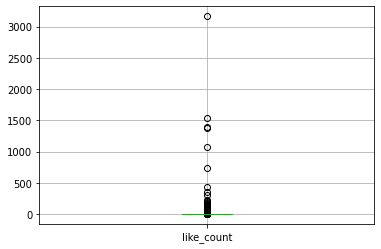

In [ ]:
tweet_pulled[['like_count']].boxplot()

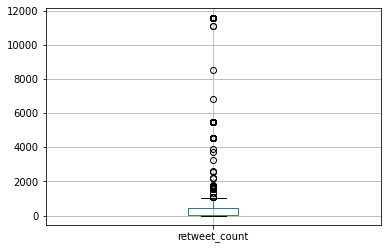

In [ ]:
tweet_pulled[['retweet_count']].boxplot()

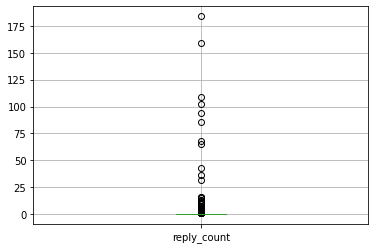

In [ ]:
tweet_pulled[['reply_count']].boxplot()

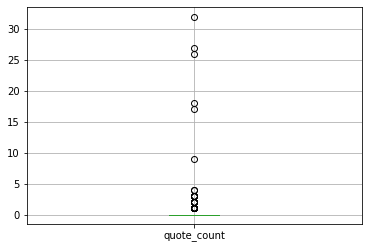

In [ ]:
tweet_pulled[['quote_count']].boxplot()

In [ ]:
tweet_pulled['geo']

0                                       
1                                       
2                                       
3                                       
4                                       
                      ...               
4208                                    
4209    {'place_id': '7df6f50f15138f28'}
4210                                    
4211                                    
4212                                    
Name: geo, Length: 4213, dtype: object

In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
class StdOutListener(StreamListener):

    def on_data(self, data):
        print (data)
        return True

    def on_error(self, status):
        print (status)


# if __name__ == '__main__':

#This handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
stream.filter(track=['python', 'javascript', 'ruby'])

{"created_at":"Thu Mar 03 06:08:10 +0000 2022","id":1499265354023018501,"id_str":"1499265354023018501","text":"T\u00e9l\u00e9gramme @willu239                          Snap \ud83d\udc7bsamuello66                                  Livraison et exp\u00e9di\u2026 https:\/\/t.co\/kO328tqMkE","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":733760634706395137,"id_str":"733760634706395137","name":"willu","screen_name":"patoutm22","location":"Paris","url":null,"description":"livraison et exp\u00e9dition dans la France contact Snapchat \ud83d\udc49\ud83c\udfff samuello66    Telegram @willu239","translator_type":"none","protected":false,"verified":false,"followers_count":14,"friends_count":156,"listed_count":0,"favour

KeyboardInterrupt: ignored

DAVID CODE FOR LOCATION

In [48]:
# import tweepy
import tweepy as tw
# authenticate
consumer_key = 'uJbX6lhdmzVPo6lOOBeDiRj93'
consumer_secret = 'o5AiZAoN45LnKj696QNbwWdZwHr7FTkYrrbyEtboxpn4fJofdU'
access_token= '1492785565594533889-maCchN69E6cbRBe4fOJAlolW9n8utd'
access_token_secret = '26eEMmpjAftW5dhYD10ThorpqW94afUquqHz8hzp98rlK'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [81]:
# search_query = "#covid19 -filter:retweets"
# search_query = "Support Small Business OR Support Small Businesses OR Shop Local OR Mom Pop Business OwnersDay" 

# search_query = "Support Small Business -filter:retweets OR Support Small Businesses -filter:retweets OR Shop Local -filter:retweets"# OR Mom Pop Business Owners Day -filter:retweets" 

In [101]:
def get_my_tweet(words):
  # get tweets from the API
  search_query = words+" -filter:retweets"
  # time.sleep(0.5)
  tweets = tw.Cursor(api.search,
                q=search_query,
                lang="en",
                since="2018-01-01").items(1000)
  # store the API responses in a list
  tweets_copy = []
  for tweet in tweets:
      tweets_copy.append(tweet)
      
  print("we got ",len(tweets_copy), " number of tweets")
  tweets_df = pd.DataFrame()
  # populate the dataframe
  for tweet in tweets_copy:
      hashtags = []
      try:
          for hashtag in tweet.entities["hashtags"]:
              hashtags.append(hashtag["text"])
          text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
      except:
          pass
      tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                                'user_location': tweet.user.location,\
                                                'user_description': tweet.user.description,
                                                'user_verified': tweet.user.verified,
                                                'date': tweet.created_at,
                                                'text': text, 
                                                'hashtags': [hashtags if hashtags else None],
                                                'source': tweet.source}))
      tweets_df = tweets_df.reset_index(drop=True)
      return tweets_df

In [102]:
tweets_df_full = pd.DataFrame()

list_words=["Support Small Business","Support Small Businesses","Shop Local"]
for i in list_words:
  temp=get_my_tweet(i)
  tweets_df_full.append(temp)

we got  1000  number of tweets
we got  1000  number of tweets
we got  1000  number of tweets


In [105]:
tweets_df_full

""


In [94]:
tweets_df_full

""
